# (Kaggle) Titanic: Machine Learning from Disaster Chap2

## 시작하기 전에

* 타이타닉 해상사고 데이터 분석을 진행하기 앞서 사용했던 파이썬 패키지 정리
    1. pip install numpy
    2. pip install scipy
    3. pip install pandas
    4. pip install scikit-learn
    5. pip install matplotlib
    6. pip install seaborn
    7. pip install jupyter

## 데이터 로드(Data Description & Loading)

* 해당 링크 참조 [Kaggle Titanic Data Description](https://www.kaggle.com/c/titanic)

In [1]:
# pandas 패키지를 사용
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# 블로그 업데이트용 jupyter notebook 크기 수정하는 부분(선택사항)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 97% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Titanic raw data 불러오기
# PassengerId를 index로 설정(데이터 탐색에 용이)
train = pd.read_csv("data/train.csv", index_col="PassengerId")

# train 데이터의 크기를 확인하는 부분
print(train.shape)

# head()를 사용 상위 5개의 행의 데이터를 확인할 수 있음
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# test.csv 데이터도 같은 방식으로 불러온다
test = pd.read_csv("data/test.csv", index_col="PassengerId")

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 탐험적 데이터 분석(Exploratory Data Analysis)

이전 챕터에 이어서 다른 데이터들도 전처리 과정을 진행해보겠습니다.(```Name```, ```SibSp```, ```Parch```) 또한 분석 이후 전처리 과정에서 수정된 데이터까지 새롭게 백업하는 과정까지 진행해 보겠습니다.

### SibSp(형제자매), Parch(부모자식) 컬럼 분석

```SibSp```와 ```Parch``` 컬럼은 둘 다 동반한 가족 수에 관한 컬럼입니다. 각각 따로 ```Survived```와의 상관관계를 살펴보면 뚜렷한 상관관계를 얻기 어렵습니다.

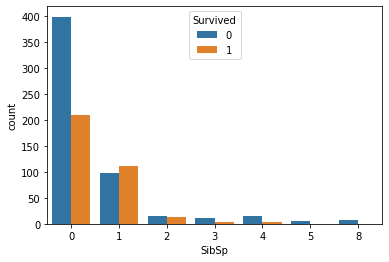

In [4]:
sns.countplot(data=train, x="SibSp", hue="Survived")

In [5]:
pd.pivot_table(train, index="SibSp", values="Survived", aggfunc=["count", "mean"])

,count,mean
,Survived,Survived
SibSp,,
0,608,0.345395
1,209,0.535885
2,28,0.464286
3,16,0.250000
4,18,0.166667
5,5,0.000000
8,7,0.000000


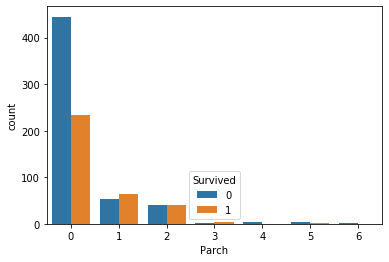

In [6]:
sns.countplot(data=train, x="Parch", hue="Survived")

In [7]:
pd.pivot_table(train, index="Parch", values="Survived", aggfunc=["count", "mean"])

,count,mean
,Survived,Survived
Parch,,
0,678,0.343658
1,118,0.550847
2,80,0.500000
3,5,0.600000
4,4,0.000000
5,5,0.200000
6,1,0.000000


각각을 살펴보면 ```SibSp```같은 경우에는 1일경우(형제자매 동반 1인 이상) 상대적으로 높았지만 수치 자체가 높지 않아서 생존률에 영향을 끼친다고 확증하기 어렵습니다. 마찬가지로 ```Parch```또한 1, 3 일때 생존률이 상대적으로 높지만 수치가 낮고 결정적으로 어떻게 생존률에 영향을 미치는지 값 별로 인과관계를 파악하기 어렵습니다. ```SibSp```와 ```Parch```둘 다 가족 인원수와 관련된 영역이므로 각각 따로 경향성을 보기 보단 두 데이터를 합쳐서 경향성을 다시 확인해 보겠습니다.

In [8]:
# SibSp, Parch 컬럼을 합쳐 새로운 컬럼인 FamilySize컬럼을 생성
# 독신일 경우를 1로 정의, 1을 더한다
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
print(train.shape)

train.head()

(891, 12)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


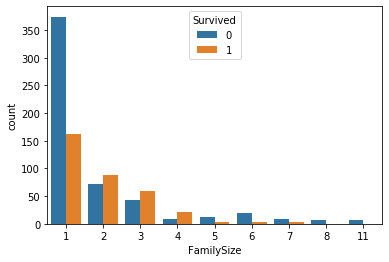

In [9]:
# FamilySize - Survived countplot
sns.countplot(data=train, x="FamilySize", hue="Survived")

In [10]:
# FamilySize, Survived 간의 pivot table
pd.pivot_table(train, index="FamilySize", values="Survived")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


분석 결과 다음과 같은 사실을 알 수 있습니다.

* 가족구성원이 혼자인 경우 생존 확률이 낮다.
* 가족구성원이 **2~4**명인 사람의 생존률이 다른 가족구성원 수 보다 높았으며 생존률이 과반 이상이다.(핵가족들의 생존률이 높았다)
* 가족구성원이 **5명 이상**이 되면 생존 확률이 떨어진다.

따라서 생존확률이 높았던 명수를 한 범주, 그리고 나머지 범주로 분류해서 생각하면 더 정확한 경향을 파악할 수 있을것으로 보이며 추후 ```test.csv```에서 생존자 판단을 하는데 유용할 것으로 보입니다.

In [11]:
# 가족 수가 1인 승객에 대한 FamilyType값을 Single로 정의
train.loc[train["FamilySize"] == 1, "FamilyType"] = "Single"

# 가족 수가 2명 이상 5명 미만인 가족을 Nuclear로 정의
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilyType"] = "Nuclear"

# 가족 수가 5명 초과인 가족을 Big으로 정의
train.loc[train["FamilySize"] >= 5, "FamilyType"] = "Big"

# 만들어진 데이터 확인
print(train.shape)
train[["FamilySize", "FamilyType"]].head(10)

(891, 13)


,FamilySize,FamilyType
PassengerId,,
1,2,Nuclear
2,2,Nuclear
3,1,Single
4,2,Nuclear
5,1,Single
6,1,Single
7,1,Single
8,5,Big
9,3,Nuclear


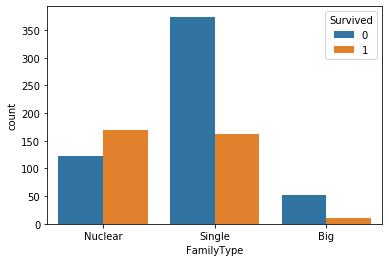

In [12]:
# 해당 데이터를 시각화 해봅니다(countplot)
sns.countplot(data=train, x="FamilyType", hue="Survived")

예상대로 핵가족(Nuclear)의 생존률이 다른 가족유형의 생존률보다 높은 것으로 확인됩니다.

In [13]:
# pivot table을 활용하여 생존률 확인
pd.pivot_table(data=train, index="FamilyType", values="Survived")

,Survived
FamilyType,
Big,0.161290
Nuclear,0.578767
Single,0.303538


분석 결과, 대가족인 경우(Big) **16.1%**, 핵가족(Nuclear)의 경우 **57.9%** 독신(Single)에 경우엔 **30.3%**이다. 

### Name(이름) 컬럼 분석

다음으로 분석할 컬럼은 승객 이름(Name)입니다. 승객의 이름은 얼핏 살펴보면 굉장히 분석하기 까다로워 보이지만, 실은 매우 간단한 패턴으로 이루어져 있습니다.
1. ```,```의 앞부분이 성(SurName)
2. ```,```과 ```.```사이에 있는 부분은 승객의 호칭(Title)입니다.
3. 마지막으로 ```.```뒤에 있는 부분은 이름(FirstName)입니다.

In [14]:
# 이름 데이터 상위 5개를 출력해 봅니다
train["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

```Braund, Mr. Owen Harris```를 보면 Braund가 성이고, Mr라는 호칭을 가진 Owen Harris라는 이름을 가진 승객이라고 보시면 됩니다.

여기서 중요한 점은 앞 뒤 이름들 보다도 **성별**과 **연령**을 나타내는 가운데 **호칭**입니다. 앞서 분석했던 대로, 성별과 연령-지불금액(더 나아가 승객의 신분)이 생존률에 어느정도 연관이 있기 때문입니다.

In [15]:
# 파이썬 함수를 작성하고 apply 메소드를 이용하여 이름 데이터에서 호칭을 따로 뽑아내는 작업을 해 봅니다.
def get_title(name):
    # split 메소드는 해당 인수문자열을 기준으로 문자열을 분리합니다.
    # 처음에 ", "를 기준으로 앞에 성을 쪼갠 데이터에서 ". "를 기준으로 다시 쪼겐 데이터의 0번째 인덱스가 호칭이 됩니다.
    return name.split(", ")[1].split(". ")[0]

# apply 메소드를 이용하여 name에서 호칭을 추출합니다
# 추출한 데이터에서 value_counts() 메소드를 사용하여 호칭의 갯수를 세어 줍니다.
train["Name"].apply(get_title).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Mme               1
Capt              1
the Countess      1
Ms                1
Jonkheer          1
Lady              1
Don               1
Sir               1
Name: Name, dtype: int64

호칭 데이터를 따로 추출한 다음 갯수를 출력해보니, Mr, Miss, Mrs, Master(젋은 미혼 남성)들이 대부분이고 나머지 Dr, Rev, Major, 기타 등등의 호칭들은 소수라 실제 생존률 반영에 큰 변수가 된다고 생각하기 어렵습니다.

정리하면 ```Name``` 데이터에서 호칭 "Mr", "Miss", "Mrs", "Master", "Etc" 등으로 묶어서 생존률과의 상관관계를 분석해보면 앞서 분석한 데이터들과 마찬가지로 유의미한 것들을 얻을 수 있을 것 같습니다.

In [16]:
# 새로운 컬럼 Title을 추가합니다.
# 앞서 apply를 사용했던 방법과 동일하게 Name 데이터에서 호칭을 추출하여 새롭게 추가하는 함수를 구성합니다.
def make_title(name):
    # Mrs호칭을 앞서 검출하는 이유 : Mr 뒤에서 검출하게 되면 Mrs 호칭은 Mr로 이미 대체 되어버려 올바르게 호칭을 추출할 수 없게 됩니다.
    # 따라서 논리 구조상 먼저 Mrs를 찾게 수정하였습니다.
    if "Mrs" in name:
        return "Mrs"
    elif "Mr" in name:
        return "Mr"
    elif "Miss" in name:
        return "Miss"
    elif "Master" in name:
        return "Master"
    else:
        return "Etc"

train["Title"] = train["Name"].apply(make_title)

print(train.shape)
train.head(10)

(891, 14)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Single,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Nuclear,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Single,Mr
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Single,Mr
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,Single,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,Big,Master
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,Nuclear,Mrs


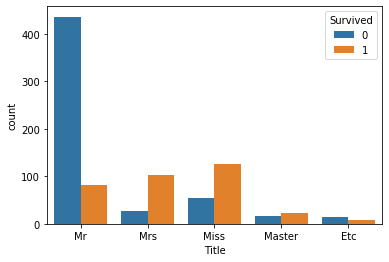

In [17]:
# 수정한 데이터를 바탕으로 데이터 시각화 및 분석을 진행해 봅니다.
sns.countplot(data=train, x="Title", hue="Survived")

In [18]:
# pivot table 결과도 확인해봅니다.
pd.pivot_table(train, index="Title", values="Survived")

,Survived
Title,
Etc,0.375000
Master,0.575000
Miss,0.700000
Mr,0.158301
Mrs,0.790698


분석 결과, 새롭게 알게 된 사실이 있습니다. 앞서 성별 데이터를 분석할 때 남성이면 거의 사망자일 확률이 높다고 하였지만, 그 중에서 **Master**의 호칭을 가진 남성은 생존률이 과반 이상이 였습니다. 

정리하면, 남성은 대부분 생존하지 못할 확률이 높지만 예외적으로 **Master**의 호칭을 가진 남성은 생존률이 과반 이상입니다. 앞서 분석했던 성별 데이터 결과와 마찬가지로 **Miss**, **Mrs** 호칭을 가진 여성들은 생존률이 상대적으로많이 높은 것으로 확인됩니다.(70%, 79%)

### 아직 까지 분석하지 않은 데이터들

이렇게 해서 타이타닉 사고 데이터를 기반으로 각 데이터별로 생존여부에 어떤 관계를 가지고 있는지 수정 및 분석을 진행해 보았습니다. 아직 분석하지 못한 데이터(```Cabin```, ```Ticket```)들이 있지만, 특정한 범주나 패턴이 바로 확인 되는 부분이 아니여서 분석을 생략했습니다. 이렇게 **EDA**를 진행한 데이터를 바탕으로 ```test.csv```데이터도 수정을 진행할 것이며(train에서 추가 및 수정된 컬럼과 동일하게 처리) 다음 챕터에서 머신러닝을 돌리기 위해 데이터를 수치화 하는 작업을 진행해 보겠습니다.

### test.csv 데이터 수정

In [19]:
# SibSp, Parch 컬럼을 합쳐 새로운 컬럼인 FamilySize컬럼을 생성
# 독신일 경우를 1로 정의, 1을 더한다
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
print(test.shape)

test.head()

(418, 11)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [20]:
# 가족 수가 1인 승객에 대한 FamilyType값을 Single로 정의
test.loc[test["FamilySize"] == 1, "FamilyType"] = "Single"

# 가족 수가 2명 이상 5명 미만인 가족을 Nuclear로 정의
test.loc[(test["FamilySize"] > 1) & (test["FamilySize"] < 5), "FamilyType"] = "Nuclear"

# 가족 수가 5명 초과인 가족을 Big으로 정의
test.loc[test["FamilySize"] >= 5, "FamilyType"] = "Big"

# 만들어진 데이터 확인
print(test.shape)
test[["FamilySize", "FamilyType"]].head(10)

(418, 12)


,FamilySize,FamilyType
PassengerId,,
892,1,Single
893,2,Nuclear
894,1,Single
895,1,Single
896,3,Nuclear
897,1,Single
898,1,Single
899,3,Nuclear
900,1,Single


In [21]:
# test 데이터 Title 데이터 추가
test["Title"] = test["Name"].apply(make_title)

In [22]:
# test 데이터 확인
print(test.shape)
test.head()

(418, 13)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,FamilyType,Title
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Single,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Nuclear,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Single,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Single,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Nuclear,Mrs


### 파일 저장하기

원본 데이터의 손상 방지 및 백업을 위해 수정한 DataFrame들을 csv로 저장합니다.

In [23]:
# train 및 test 데이터들을 train(test)_modify.csv로 저장합니다.
train.to_csv("data/train_modify.csv")
test.to_csv("data/test_modify.csv")